In [10]:
import pandas as pd

In [11]:
df1 = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Mall_Customers.csv")

In [12]:
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df1.drop(columns=["CustomerID"],inplace= True)

In [15]:
import seaborn as sns
import matplotlib.pyplot  as plt

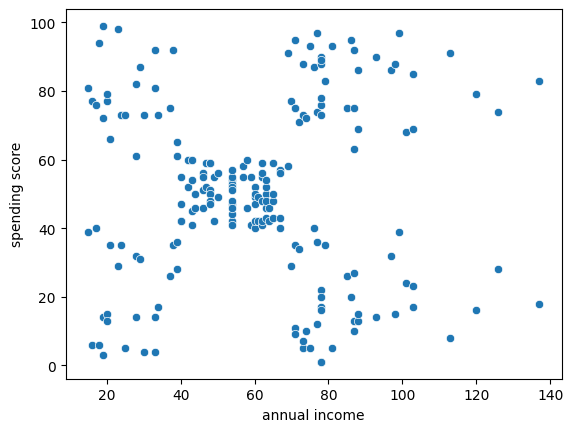

In [16]:
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

In [17]:
x =df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [20]:
from sklearn.cluster import KMeans
wcss = []
K_values = range(1, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

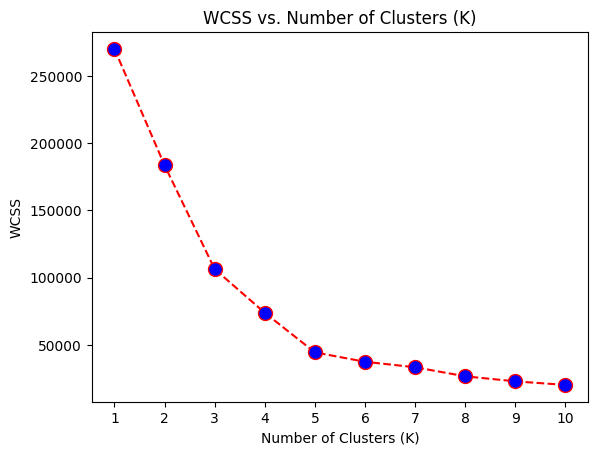

In [21]:
plt.plot(K_values, wcss, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xticks(K_values)
plt.title('WCSS vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [22]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++')
df1['Cluster'] = kmeans.fit_predict(x)
df1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [23]:
df1['Cluster'].unique()

array([2, 1, 0], dtype=int32)

In [24]:
centroids = kmeans.cluster_centers_
centroids

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

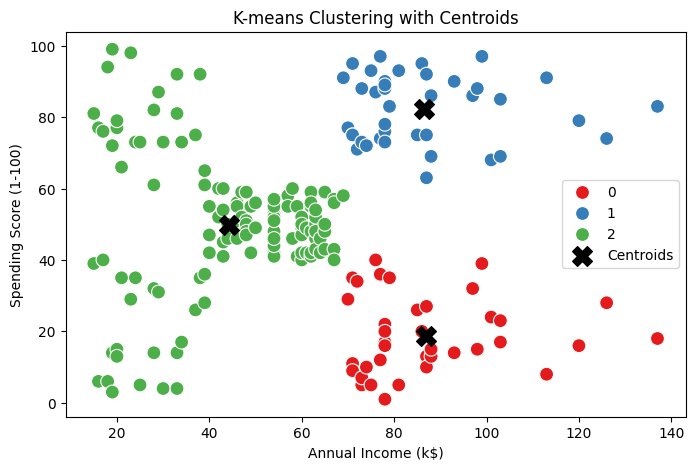

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with Centroids')
plt.legend()
plt.show()

In [26]:
df1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2
